In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

## Merging 12 months of sales into a single file

In [2]:
join_files = os.listdir('./dados/Sales_Data/')
_ = [print(file) for file in join_files]


Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [3]:

df = pd.read_csv('./dados/Sales_Data/Sales_April_2019.csv')

all_months_data = pd.DataFrame()

for file in join_files:
    df = pd.read_csv('./dados/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [4]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Augment data with additional columns

### Find 'or' and delete

In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Add month column

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('Int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


##### Convert columns to the correct type

In [7]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Clean up the data

#### Drop rows of NaN

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


### Add a sales column

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### What was the best month for sales? How much was earned that month?

In [10]:
results = all_data.groupby('Month').sum()

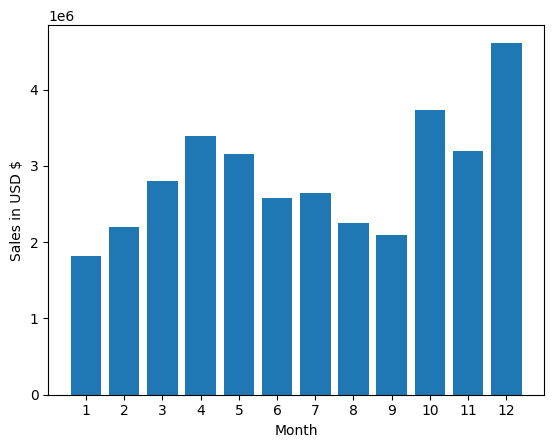

In [11]:
months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD $')
plt.xlabel('Month')
plt.show()

### What city had the highest number of sales?

##### Add a city column

In [12]:
def get_city(address):
    return address.split(',')[1].strip()

def get_state(address):
    return address.split(',')[2].strip().split(' ')[0]

all_data['Cities'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [13]:
results = all_data.groupby('Cities').sum()
results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
Cities,,,,,,,,
Atlanta (GA),2956692956932957102957372957372957562957602957...,USB-C Charging CableWired HeadphonesAAA Batter...,16602.0,2779908.20,12/18/19 12:3812/16/19 16:4012/26/19 19:0912/1...,"43 Hill St, Atlanta, GA 30301856 12th St, Atla...",104794,2795498.58
Austin (TX),2956802957022957032957032957542957892957982958...,Lightning Charging CableWired HeadphonesAA Bat...,11153.0,1809873.61,12/01/19 14:3012/21/19 18:5012/17/19 12:2712/1...,"338 Main St, Austin, TX 73301628 River St, Aus...",69829,1819581.75
Boston (MA),2956772956812956812956812956812956872956952957...,AA Batteries (4-pack)Google PhoneUSB-C Chargin...,22528.0,3637409.77,12/20/19 19:1912/25/19 12:3712/25/19 12:3712/2...,"866 Pine St, Boston, MA 0221579 Elm St, Boston...",141112,3661642.01
Dallas (TX),2956722956732956742956782956792956942957242957...,USB-C Charging CableBose SoundSport Headphones...,16730.0,2752627.82,12/13/19 09:2912/15/19 23:2612/28/19 11:5112/0...,"813 Hickory St, Dallas, TX 75001718 Wilson St,...",104620,2767975.40
Los Angeles (CA),2956762956882956912956922957062957142957162957...,ThinkPad LaptopApple Airpods HeadphonesBose So...,33289.0,5421435.23,12/28/19 17:1912/08/19 11:2112/22/19 18:3412/1...,"410 Lincoln St, Los Angeles, CA 90001546 Park ...",208325,5452570.80


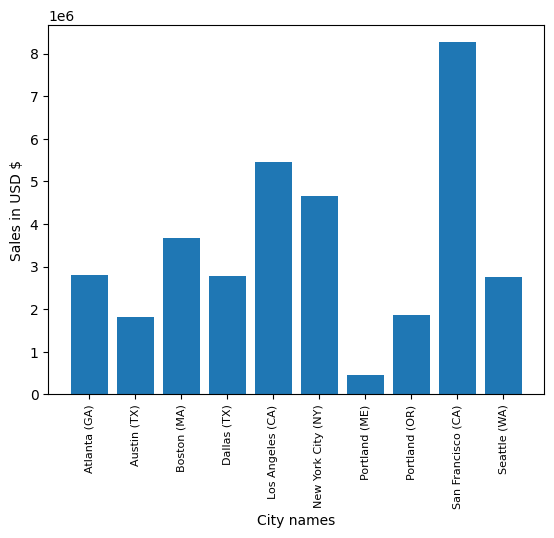

In [16]:
cities = [cities for cities, df in all_data.groupby('Cities')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation=90, size=8)
plt.ylabel('Sales in USD $')
plt.xlabel('City names')
plt.show()
